# Previous Core/Starter Notebook

**Student:** Matthew Malueg

## Loading and Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.tsa.api as tsa

In [2]:
# Customization options
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
# Import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [3]:
# Custom function for formatting y-axis to thousands of dollars, 'K'
def thousands(x, pos):
    """Use with matplotlib FuncFormatter - formats y-axis into thousands"""
    new_x = x/1000
    return f"{new_x:,.0f}K"
fmt_thous = mticks.FuncFormatter(thousands)

**Load and preview dataframe**

In [4]:
df = pd.read_csv("Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
display(df.head())
df.info()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


## Data Preparation and Visualization

### Part 1

In [5]:
# Filter the four largest cities (0-3 for SizeRank)
four_largest = df[df['SizeRank'] < 4]
four_largest.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [6]:
# Melt the data into long-form
melted = pd.melt(four_largest, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType',
                                        'StateName', 'State', 'Metro', 'CountyName'],
                 value_name='HomeValue', var_name='SaleDate')

In [7]:
# Convert SaleDate to datetime type
melted['SaleDate'] = pd.to_datetime(melted['SaleDate'])
# Set SaleDate as index
melted = melted.set_index('SaleDate')
melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,HomeValue
SaleDate,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


In [8]:
# Resample the dataframe as monthly frequency, grouped by City
melted_ts = melted.groupby('RegionName').resample('M').sum(numeric_only=True)
melted_ts

RegionID  SizeRank  HomeValue
RegionName SaleDate                                 
Chicago    2000-01-31     17426         3   166139.0
           2000-02-29     17426         3   166536.0
           2000-03-31     17426         3   167368.0
           2000-04-30     17426         3   168826.0
           2000-05-31     17426         3   170499.0
...                         ...       ...        ...
New York   2022-05-31      6181         0   768797.0
           2022-06-30      6181         0   773944.0
           2022-07-31      6181         0   777692.0
           2022-08-31      6181         0   779960.0
           2022-09-30      6181         0   781622.0

[1092 rows x 3 columns]

### Part 2

**Plot the home values for all 4 cities.**

In [9]:
## Plot the home values for all 4 cities
# First use unstack to get cities and home values in columns
unstacked_values = melted_ts['HomeValue'].unstack(level=0)
unstacked_values

RegionName,Chicago,Houston,Los Angeles,New York
SaleDate,,,,
2000-01-31,166139.0,109068.0,234181.0,253690.0
2000-02-29,166536.0,109079.0,234401.0,255517.0
2000-03-31,167368.0,108878.0,235513.0,257207.0
2000-04-30,168826.0,108881.0,237589.0,260310.0
2000-05-31,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-31,312487.0,265558.0,990391.0,768797.0
2022-06-30,314663.0,268901.0,992337.0,773944.0
2022-07-31,315910.0,271059.0,992630.0,777692.0


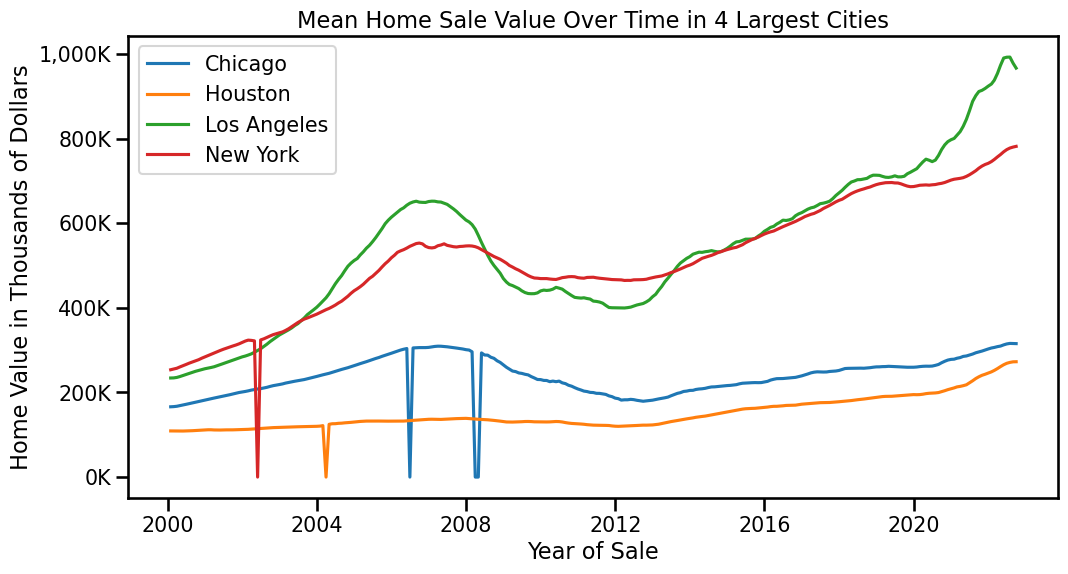

In [10]:
# Second, reformat the y-axis to use thousands of dollars, labeled with 'K' at the end
fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(unstacked_values)
ax1.set_ylabel('Home Value in Thousands of Dollars')
ax1.set_xlabel('Year of Sale')
ax1.set_title('Mean Home Sale Value Over Time in 4 Largest Cities')
ax1.yaxis.set_major_formatter(fmt_thous)
ax1.legend(unstacked_values.columns);

**Answer the following:**
1. Which city had the highest Typical Home Value at the end of 2008? Which had the least?
2. How much did the home values change from November 2008 to December 2008?

In [11]:
# Slice out data for the end of 2008
sliced = unstacked_values.loc[pd.IndexSlice['12/2008']]
sliced

RegionName,Chicago,Houston,Los Angeles,New York
SaleDate,,,,
2008-12-31,265306.0,131283.0,469294.0,510309.0


**1)** At the end of 2008, New York had the highest typical home value, while Houston had the least.

In [12]:
## Find the difference in values between Nov and Dec 2008
# Create a dataframe of differenced values
diff_vals = unstacked_values.diff()
# Slice out data for Dec (diff from Nov)
sliced_diff = diff_vals.loc[pd.IndexSlice['12/2008']]
sliced_diff

RegionName,Chicago,Houston,Los Angeles,New York
SaleDate,,,,
2008-12-31,-5753.0,-964.0,-12611.0,-4458.0


**2)** At the end of December 2008, typical home prices had changed by the following amount compared to November:
- Chicago: ($5,753)
  
- Houston: ($964)
  
- Los Angeles: ($12,611)

- New York: ($4,458)

# Gridsearch SARIMA Core
**Student:** Matthew Malueg

**Goal:** For homes in the city with the highest value in 2008 (New York), forecast home values 6 months into the future.

### Additional Imports and Custom Functions

In [13]:
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs
import pmdarima as pm

# Set wide fig size for plots
plt.rcParams['figure.figsize']=(12,3)

In [14]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [15]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)



    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig

In [16]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

### Filter, Clean, and Examine Dataset

In [18]:
# Re-examine dataframe
unstacked_values.info()
unstacked_values.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 273 entries, 2000-01-31 to 2022-09-30
Freq: M
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      273 non-null    float64
 1   Houston      273 non-null    float64
 2   Los Angeles  273 non-null    float64
 3   New York     273 non-null    float64
dtypes: float64(4)
memory usage: 10.7 KB


RegionName,Chicago,Houston,Los Angeles,New York
SaleDate,,,,
2022-05-31,312487.0,265558.0,990391.0,768797.0
2022-06-30,314663.0,268901.0,992337.0,773944.0
2022-07-31,315910.0,271059.0,992630.0,777692.0
2022-08-31,315587.0,272400.0,978196.0,779960.0
2022-09-30,315429.0,272639.0,966595.0,781622.0


In [19]:
# Filter to only values from 2018 onward
df_filt = unstacked_values.loc['2018':]
# Filter to just NY
ny = df_filt['New York']
ny.head()

SaleDate
2018-01-31    656700.0
2018-02-28    661012.0
2018-03-31    665672.0
2018-04-30    669989.0
2018-05-31    673514.0
Freq: M, Name: New York, dtype: float64

In [20]:
# Check and address null values
ny.isna().sum()

0

**Decompose and check for seasonality**

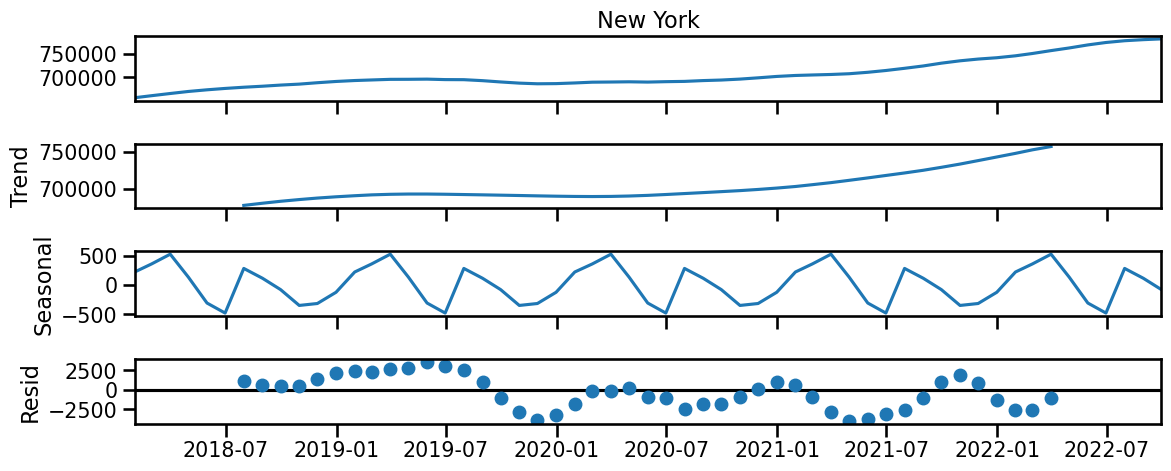

In [21]:
decomp = tsa.seasonal_decompose(ny)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [22]:
## How impactful is this seasonal component
# Get seasonal compt size
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is seasonal compt relative to timeseries
print(f"The seasonal component is {seasonal_delta: .2f} which is ~{seasonal_delta/(ny.max()-ny.min()) * 100 :.2f}% of the variation in time series.") 

The seasonal component is  1006.13 which is ~0.81% of the variation in time series.


- The plot of seasonality seems to be on a one-year cycle, but the overall impact on prices is less than 1%.

### Determine Time Series Model Orders

In [23]:
# Check for stationarity
get_adfuller_results(ny)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,0.407572,4,52,0.981776,0.05,False


In [24]:
## Check req number of diffs
# Nonseasonal
d = ndiffs(ny)
print(f'd = {d}')
# Seasonal
D = nsdiffs(ny, m=12)
print(f'D = {D}')

d = 2
D = 0


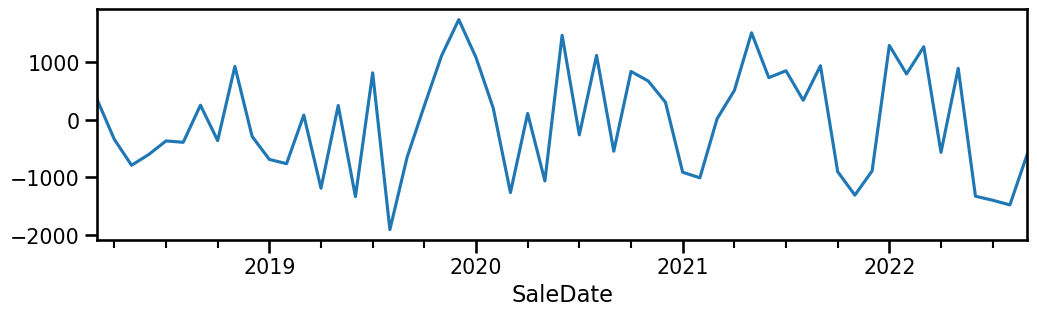

In [25]:
# Difference data
ny_diff = ny.diff().diff().dropna()
ny_diff.plot();

In [26]:
# Re-examine ADFuller
get_adfuller_results(ny_diff)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-5.461615,2,52,0.000003,0.05,True


**Estimating Model Orders with ACF/PACF**

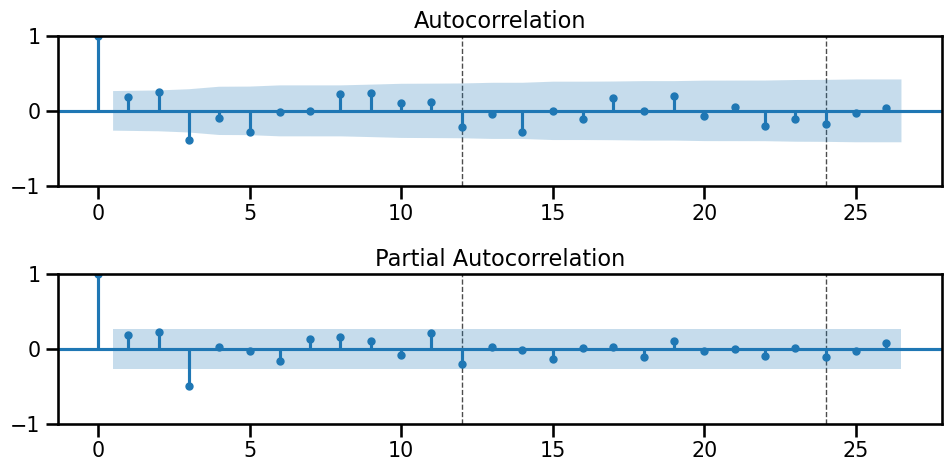

In [27]:
# Examine ACF/PACF plots of stationary data
plot_acf_pacf(ny_diff, annotate_seas=True, m=12, nlags=26);

- Both ACF and PACF are low from lag 1 on, but there is possibly a gradual decline for PACF. Try 0 and 1 to start.
- There is a significant point at lag 3 for both graphs.
- There is possibly a faint gradual decrease for the seasonal lags, try P and Q at 1 first.
- Initial choices are (0,2,1)(1,0,1,12)

### Manual SARIMA Model

**Train Test Split**

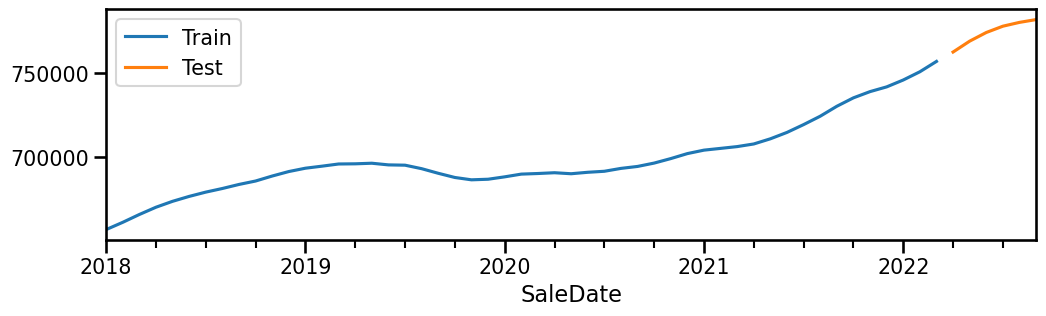

In [28]:
## Perform TTS to get a future forecast
# Supply the whole dataset, not just 'test'
train, test = train_test_split(ny, test_size=6)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

**Fit SARIMA Model**

In [29]:
## Fit with initial model
# Orders for non seasonal components
p = 0  # nonseasonal AR
d = 2  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

**Display Summary, Forecast, and Metrics**

In [30]:
# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                         New York   No. Observations:                   51
Model:             ARIMA(0, 2, 1)x(1, 0, 1, 12)   Log Likelihood                -402.115
Date:                          Thu, 07 Dec 2023   AIC                            812.230
Time:                                  03:33:23   BIC                            819.797
Sample:                              01-31-2018   HQIC                           815.101
                                   - 03-31-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0014      0.100     -0.014      0.989      -0.197       0.194
ar.S.L12      -0.0753      4.430     -0.017      0.986      -8.759       8.608
ma.S.L12       0.0767      4.430      0.017      0.986      -8.606       8.759
sigma2       7.96e+05   1.37e-05   5.79e+10      0.000    7.96e+05    7.96e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.27   Jarque-Bera (JB):                 1.83
Prob(Q):                              0.26   Prob(JB):                         0.40
Heteroskedasticity (H):               2.08   Skew:                            -0.03
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.23e+27. Standard errors may be unstable.
"""

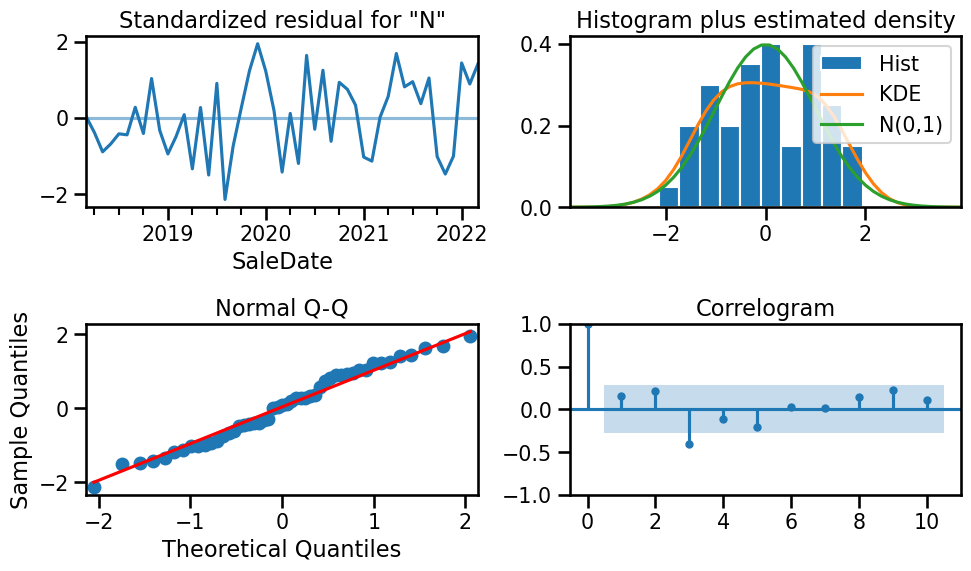

In [31]:
# Plot diagnostics
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 4,229.090
- MSE = 36,359,413.247
- RMSE = 6,029.877
- R^2 = 0.194
- MAPE = 0.54%


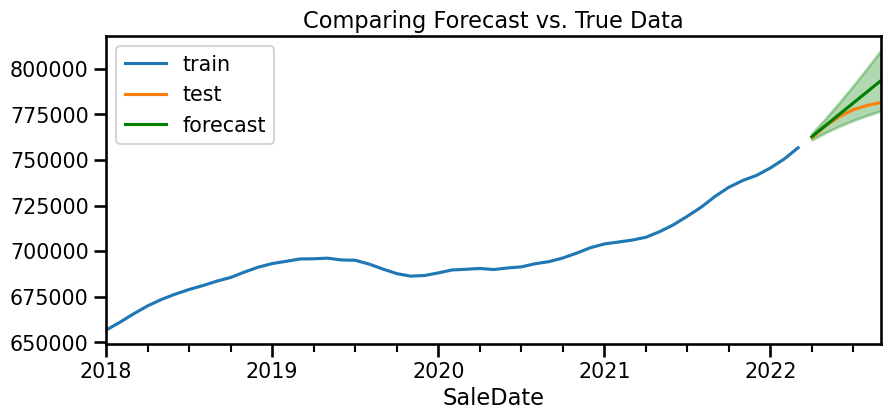

In [32]:
# Obtain forecast as a dataframe
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Plot forecast, con intervals, true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

### auto_arima Model

**Fit auto_arima Model**

In [33]:
# Fit model to training data
import pmdarima as pm
auto_model = pm.auto_arima(train, seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1040.347, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=909.717, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=930.102, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=912.587, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=940.569, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=911.717, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=911.717, Time=0.01 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=913.717, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=928.324, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=910.593, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=907.207, Time=0.05 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=909.209, Time=0.14 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1024.876, Time=0.06 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=911.335, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[12] interc

In [34]:
# Suggested model orders from auto_arima
print(auto_model.order)
print(auto_model.seasonal_order)

(1, 1, 1)
(0, 0, 0, 12)


**Display Summary, Forecast, and Metrics**

In [35]:
# Examine summary from auto_arima
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   51
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -449.603
Date:                Thu, 07 Dec 2023   AIC                            907.207
Time:                        03:33:26   BIC                            914.855
Sample:                    01-31-2018   HQIC                           910.119
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    593.8235   1281.381      0.463      0.643   -1917.637    3105.283
ar.L1          0.6749      0.693      0.974      0.330      -0.683       2.032
ma.L1         -0.6674      0.694     -0.962      0.336      -2.028       0.693
sigma2      3.622e+06      0.252   1.44e+07      0.000    3.62e+06    3.62e+06
===================================================================================
Ljung-Box (L1) (Q):                  37.34   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.00   Prob(JB):                         0.99
Heteroskedasticity (H):               4.84   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.08e+24. Standard errors may be unstable.
"""

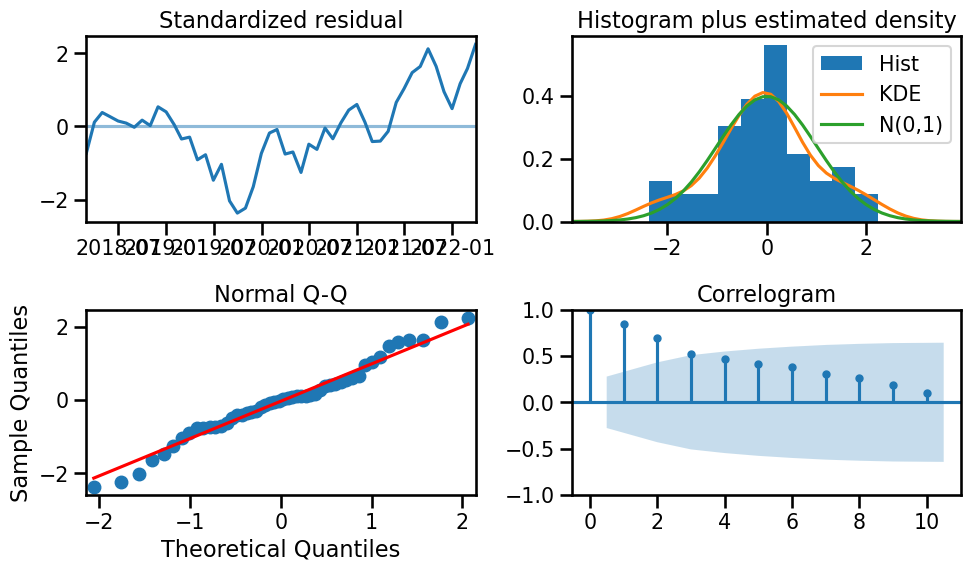

In [36]:
# Plot diagnostics
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 10,336.391
- MSE = 119,088,166.132
- RMSE = 10,912.752
- R^2 = -1.640
- MAPE = 1.33%


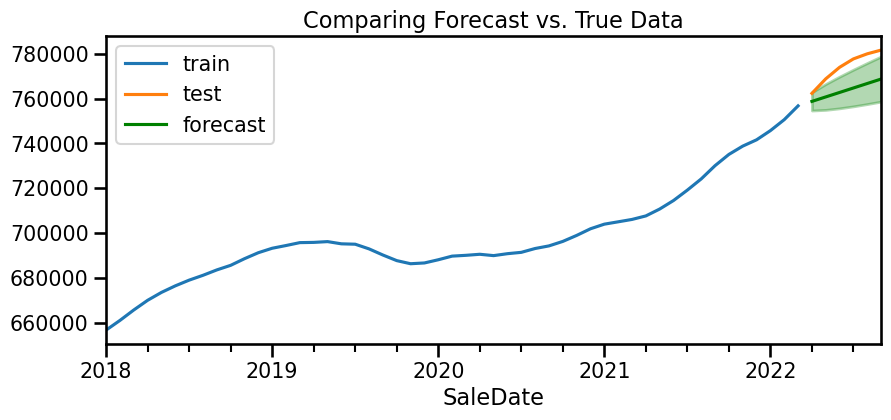

In [37]:
## Use auto_arima parameters to fit an ARIMA for forecast
# Input the order and seasonal order from auto_arima
auto_model = tsa.ARIMA(train, order=auto_model.order, seasonal_order=auto_model.seasonal_order).fit()

# Obtain forecast as a dataframe
forecast_df = auto_model.get_forecast(steps=len(test)).summary_frame()
# Plot forecast, con intervals, true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

- It appears in this case that the initial model had a better performance than the auto_arima model.
- The original model was differenced twice as per the results of checking ndiffs, but the auto_arima model suggested only once.
- Going forward in the exercise, the chosen model will be the initial manual SARIMA Model.

### Future Forecasts

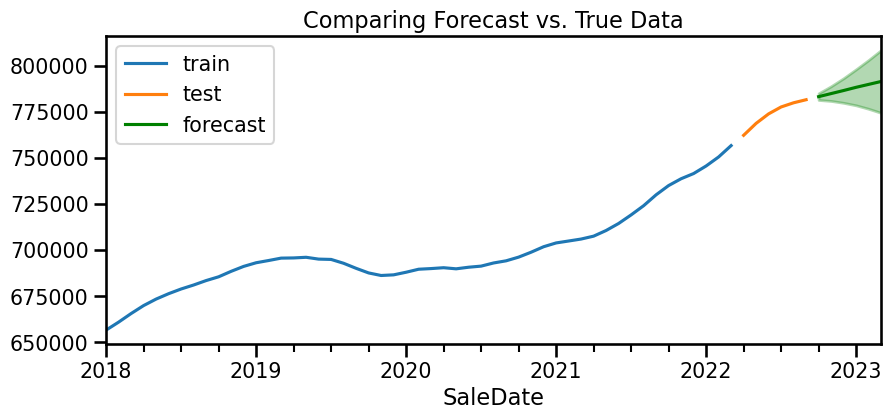

In [38]:
## Use initial 'sarima' model as final choice
final_model = tsa.ARIMA(ny, order=(p,d,q), seasonal_order=(P,D,Q,m)).fit()
# Obtain future forecast
forecast_df = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train, test, forecast_df);

**Calculate Value Changes**

In [41]:
## Find change in value from first to last month of forecast
# Find starting value
starting_value = forecast_df['mean'].iloc[0]
# Find final value
final_value = forecast_df['mean'].iloc[-1]
# Calculate change in value
change = final_value - starting_value
# Find change as percentage
perc_change = change/starting_value

# Summarize
print(f'Over the forecasted time period, the mean home value will increase from ${round(starting_value)} \
to ${round(final_value)}, for a total of ${round(change)}. \nThis represents an increase of {round(perc_change, 3)}%.')

Over the forecasted time period, the mean home value will increase from $783285 to $791511, for a total of $8227. 
This represents an increase of 0.011%.


### Conclusions
- The predicted home value in NY six months into the future is \\$791,511 which is an increase of \\$8,227.
- The change in home values over the six month period was 0.011%